## Aliasing

Até o momento consideramos que não ocorreram sobreposições no espectro do sinal amostrado. Este é o caso quando o limite da frequência superior $\omega_u$ do sinal passa-baixo é menor que $\frac{\omega_s}{2}$. Aqui a perfeita reconstrução do sinal contíuno $x(t)$, a partir de sua contraparte discreta $x[k]$ é possível. No entando, quando esta condição não é cumprida, as repetições do sinal contínuo do espectro se sobrepoem. Isso é ilustrado na figura a seguir:


![Aliasing](http://nbviewer.jupyter.org/github/spatialaudio/signals-and-systems-lecture/blob/master/sampling/aliasing.png)

## Teorema de amostragem

A partir da afirmação acima, podemos concluir que a condição suficiente para a perfeita reconstrução de um sinal passa-baixo de valor real $x(t)$ é dado como:

$\omega_s \geq 2*\omega_c$

A frequência mínima de amostragem deve ser escolhida sendo o dobro da maior frequência presente no sinal contínuo. Esta condição é conhecida como teorema de amostragem de Nyquist-Shannon. Apenas quando esta condição é cumprida, toda informação contida em um sinal passa-baixo $x(t)$ é representada pelas amostras $x[k] = x(kT)$.

Dependendo da relação entre a frequência de amostragem $\omega_s$ e o limite superior de frequência $\omega_u$ de um sinal passa-baixo, existem três casos distintos:


- Super-amostragem $\omega_s > 2 * \omega_c$
- Amostragem crítica $\omega_s = 2 * \omega_c$
- Sub-amostragem $\omega_s < 2 * \omega_c$

Em aplicações práticas a amostragem é sempre em certo grau superamostrada, pois o passa-baixo ideal utilizado para reconstruir um sinal contínuo não pode ser realizado.

Exemplos de taxas de amostragem em áudio são:

In [5]:
%matplotlib inline

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
sym.init_printing()

t = sym.symbols('t', real=True)
k = sym.symbols('k', integer=True)

# faster than sympy.sinc
def sinc(x):
    return sym.sin(x)/x


def ideal_sampling(x, k, w_s):
    kappa = sym.symbols('kappa')
    xs = sym.lambdify(kappa, x.subs(t, kappa * 2 * sym.pi / w_s))
    return [xs(kappa) for kappa in k]


def ideal_reconstruction(xs, k, w_s):
    T = 2*sym.pi/w_s
    return sum(xs[n] * sinc(sym.pi / T * (t - k[n] * T)) for n in range(len(k)))


In [6]:
def plot_signals(xs, y, w_s, k):
    
    plt.stem(k*2*np.pi/w_s, xs)
    plt.xlabel('$t$ in s')
    plt.ylabel('$x_s[k] = x_s(kT)$')
    plt.axis([0, 5, -1.2, 1.2])

    sym.plot(y, (t,0,5), xlabel='$t$', ylabel='$y(t)$', ylim=(-1.2, 1.2))
    

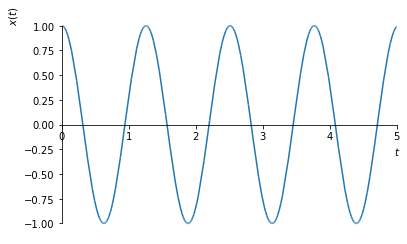

In [7]:
w_0 = 5
x = sym.cos(w_0 * t)

sym.plot(x, (t,0,5), xlabel=r'$t$', ylabel=r'$x(t)$')


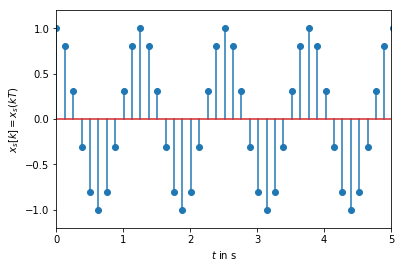

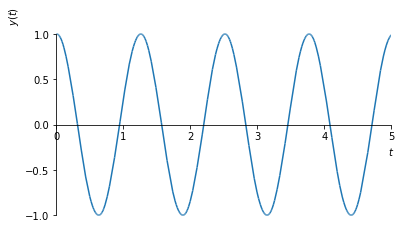

In [8]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)


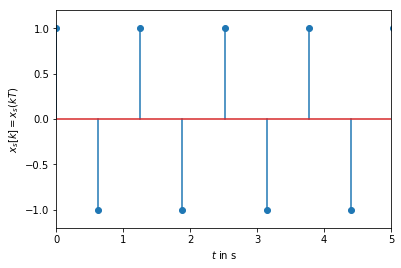

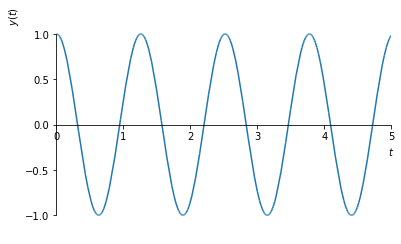

In [9]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)


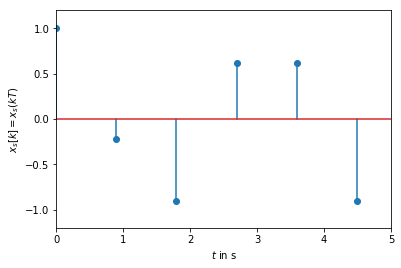

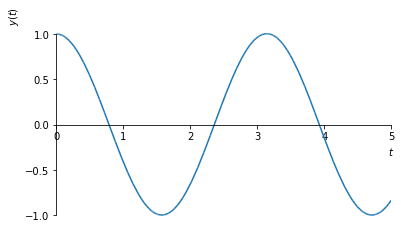

In [11]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)
